In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nvidia-tensorrt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Импорт библиотеки, загрузка и подготовка набора данных

In [48]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
cifar = tf.keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar.load_data()

# Нормируем данные
x_train = x_train / 255.0
x_test = x_test / 255.0

Построим последовательную модель

In [50]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, AvgPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout

model = Sequential()
# Первый свёрточный слой
model.add(Conv2D(
    32,
    kernel_size=(3,3),
    padding="same",
    activation='relu',
    input_shape=(32, 32, 3),
))
model.add(BatchNormalization())  # нормализуем данные 
model.add(MaxPooling2D(  # уменьшим размерность данных
    pool_size=(2, 2), 
    strides=(2, 2)
))
model.add(Dropout(0.2))
# Второй свёрточный слой
model.add(Conv2D(
    64,
    kernel_size=(3,3),
    padding="same",
))
model.add(BatchNormalization())  # нормализуем данные 
model.add(MaxPooling2D(  # уменьшим размерность данных
    pool_size=(2, 2), 
    strides=(2, 2)
))
model.add(Dropout(0.25))
# Третий свёрточный слой
model.add(Conv2D(
    128, 
    kernel_size=(3,3),
    padding="same",
))
model.add(BatchNormalization())  # нормализуем данные 
model.add(MaxPooling2D(  # уменьшим размерность данных
    pool_size=(2, 2), 
    strides=(2, 2)
))
model.add(Dropout(0.3))

# Полносвязный слой
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())  # нормализуем данные 
model.add(Dropout(0.4))
model.add(Dense(100, activation='softmax'))
print(model.summary())


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_60 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_60 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_46 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_61 (Bat  (None, 16, 16, 64)     

In [51]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0005),  # снижаем частоту обучения, чтобы не возникло ситуаций переобучения
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)


Обучим модель на выбранном датасете Cifar100

In [52]:
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    validation_data=(x_test, y_test),
)

Epoch 1/5
1563/1563 [==============================] - 25s 15ms/step - loss: 3.9742 - accuracy: 0.1144 - val_loss: 3.4572 - val_accuracy: 0.1902
Epoch 2/5
1563/1563 [==============================] - 24s 15ms/step - loss: 3.2435 - accuracy: 0.2176 - val_loss: 2.9544 - val_accuracy: 0.2757
Epoch 3/5
1563/1563 [==============================] - 23s 15ms/step - loss: 2.9291 - accuracy: 0.2752 - val_loss: 2.8249 - val_accuracy: 0.3112
Epoch 4/5
1563/1563 [==============================] - 24s 15ms/step - loss: 2.7530 - accuracy: 0.3096 - val_loss: 2.6633 - val_accuracy: 0.3417
Epoch 5/5
1563/1563 [==============================] - 24s 15ms/step - loss: 2.6238 - accuracy: 0.3358 - val_loss: 2.4141 - val_accuracy: 0.3862


Оценим модель

In [55]:
results = model.evaluate(x_test, y_test)
print(f"Accuracy of model: {results[1]}, Loss function value: {results[0]}")

313/313 [==============================] - 2s 5ms/step - loss: 2.4141 - accuracy: 0.3862
Accuracy of model: 0.3862000107765198, Loss function value: 2.414139986038208


Посмотрим на графики изменения точности и значения функции ошибки

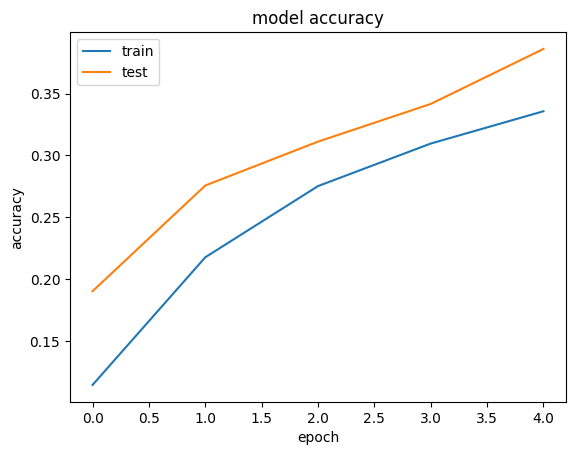

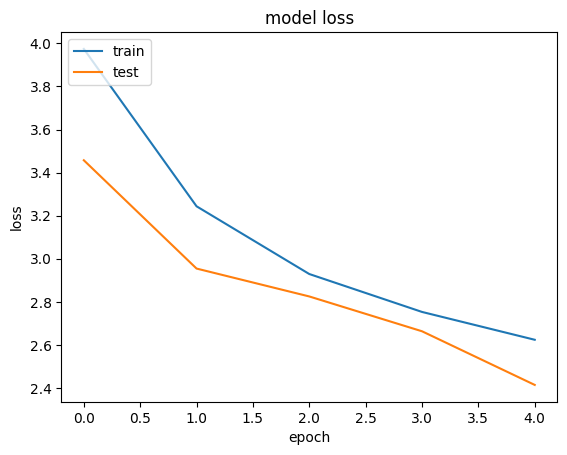

In [54]:
import matplotlib.pyplot as plt 
# строим график изменения точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# строим график изменения значения функции ошибки
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()